In [67]:
import pandas as pd
import altair as alt
import numpy as np
from datetime import datetime

In [68]:
data = pd.read_csv("Geolocated Data - Sales & Prospect - 5.11.2023.csv")

# Drop all features that are common between the prospect and sales dataframes
df = data.drop(['FullAddress', 'StreetName', 'JobStatus', 'SalesRepName1', 'SalesRepName2', 'Accuracy.Score', 'Accuracy.Type'], axis = 1)

df = df.astype({'productid':'string'})

# Prospect is defined by not having a contract date
prospect = df[df.ContractDate.isnull()]
sales = df.dropna(subset = ['ContractDate'])

sales = sales.astype({'productId':"str",
                      'City':'str',
                      'State':'str',
                      'Source':'str',
                      'Subsource':'str',
                      'Zip':'int'})

prospect = prospect.astype({'':''})


C:\Users\user\AppData\Local\Temp\ipykernel_8040\679535329.py:1: DtypeWarning: Columns (3,9,10,11,12,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Geolocated Data - Sales & Prospect - 5.11.2023.csv")


In [69]:
# Drop columns not used in each dataset

sales = sales.drop(['DateAdded', 'Issued', 'Sat'], axis = 1)
prospect = prospect.drop(['GrossAmount', 'ContractDate', 'Source'], axis = 1)

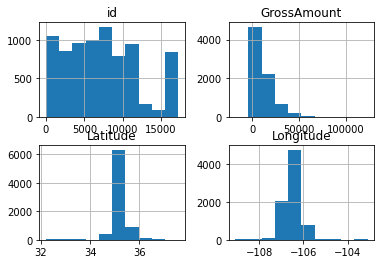

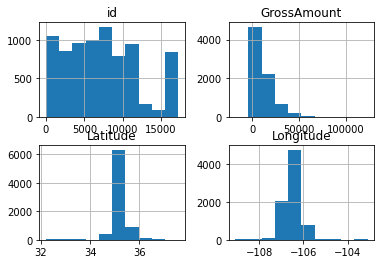

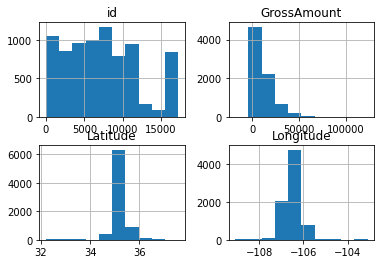

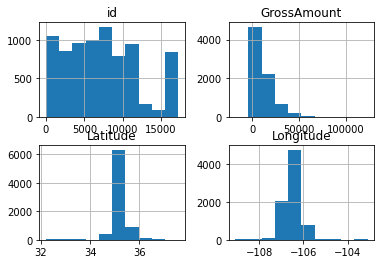

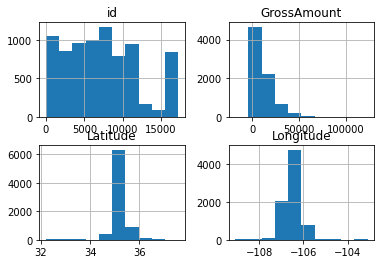

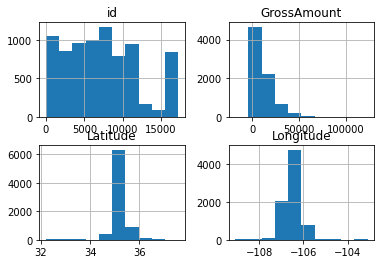

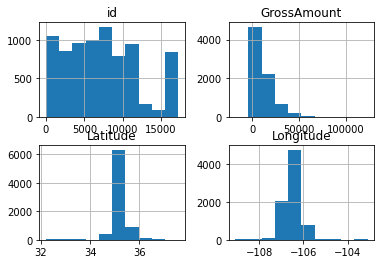

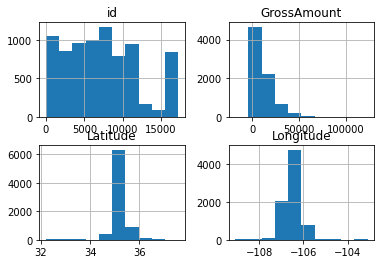

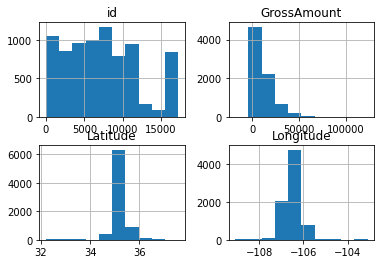

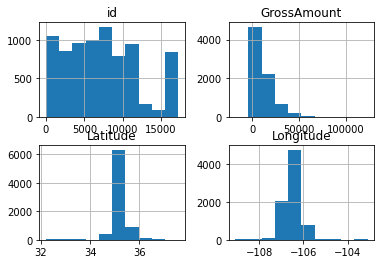

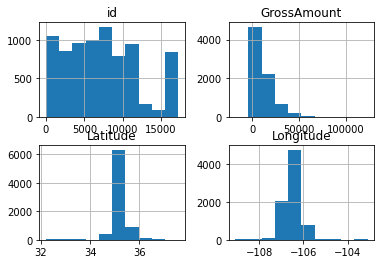

In [70]:
# Missing value handling

for feature in sales:
    sales.hist()

In [71]:
print(sales.info())
sales.head()
#sales.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7854 entries, 0 to 7853
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7854 non-null   int64  
 1   productid     7852 non-null   object 
 2   GrossAmount   7854 non-null   float64
 3   ContractDate  7854 non-null   object 
 4   City          7854 non-null   object 
 5   State         7827 non-null   object 
 6   Zip           7854 non-null   object 
 7   Source        7854 non-null   object 
 8   SubSource     7854 non-null   object 
 9   Latitude      7854 non-null   float64
 10  Longitude     7854 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 736.3+ KB
None


,id,productid,GrossAmount,ContractDate,City,State,Zip,Source,SubSource,Latitude,Longitude
0,17269,Bath,10144.0,5/10/2023,Albuquerque,NM,87123,Print,Valpak,35.057871,-106.495715
1,17268,Bath,8738.0,5/8/2023,Albuquerque,NM,87122,Internet,Google,35.192038,-106.540850
2,17267,Bath,10379.0,5/5/2023,Albuquerque,NM,87109,Print,Mailer - Bath,35.158152,-106.570980
3,17265,Bath,9328.0,5/4/2023,Albuquerque,NM,87114,Internet,Google,35.213290,-106.668686
4,17263,Bath,10764.0,5/1/2023,Albuquerque,NM,87112,Spectrum,FM - PPC Quote,35.104817,-106.540097


In [72]:
print(prospect.info())
prospect.head()
#prospect.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46247 entries, 7854 to 54100
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         46247 non-null  int64  
 1   productid  43639 non-null  object 
 2   City       45576 non-null  object 
 3   State      45365 non-null  object 
 4   Zip        45671 non-null  object 
 5   SubSource  46194 non-null  object 
 6   DateAdded  46244 non-null  object 
 7   Issued     46247 non-null  object 
 8   Sat        46247 non-null  object 
 9   Latitude   46247 non-null  float64
 10  Longitude  46247 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 4.2+ MB
None


,id,productid,City,State,Zip,SubSource,DateAdded,Issued,Sat,Latitude,Longitude
7854,77,PC,Albuquerque,NM,87123,H&G Show,5/1/2000,True,True,35.059818,-106.523879
7855,76,PC,Albuquerque,NM,87123,Home Base,5/1/2000,True,True,35.084984,-106.489957
7856,78,PC,Albuquerque,NM,87120,H&G Show,5/2/2000,True,True,35.158232,-106.688017
7857,79,Sun,Albuquerque,NM,87106,H&G Show,5/3/2000,True,True,35.074063,-106.609919
7858,80,PC,Albuquerque,NM,87114,Home Builders Show,5/8/2000,True,True,35.210273,-106.695623
